## Imbalance output colume Dataset to Balance with Logistic Regression (Solve Binary Classification)

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
dataset =pd.read_csv(r"C:\Users\Muhammad Uzair\Downloads\Datasets\Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [103]:
dataset = dataset.drop(['User ID', 'Gender'], axis=1)

In [104]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [105]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [106]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [107]:
x = dataset.iloc[:, :-1]
y = dataset['Purchased']

### Random Over Sampling Example

In [108]:
#Resampling the dataset
%pip install imbalanced-learn

#from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)




Note: you may need to restart the kernel to use updated packages.


c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


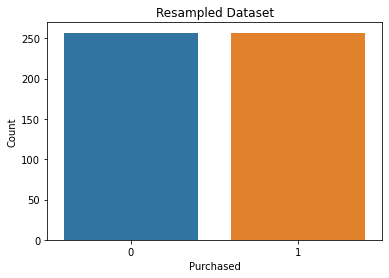

In [109]:
# Visualizing the resampled dataset
sns.countplot(x=y_resampled)
plt.title('Resampled Dataset')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

In [110]:
y_resampled.value_counts()

0    257
1    257
Name: Purchased, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [113]:
print(f'Test Score :',model.score(x_train,y_train)*100, '%')
print(f'Test Score :',model.score(x_test, y_test)*100, '%')

Test Score : 82.48175182481752 %
Test Score : 86.40776699029125 %


In [114]:
model.predict([[48,29000]])

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### Random Under Sampling Example

In [116]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [119]:
x = dataset.iloc[:, :-1]
y = dataset['Purchased']

In [120]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [122]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_rus_resampled, y_rus_resampled = rus.fit_resample(x, y)

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [123]:
y_rus_resampled.value_counts()

0    143
1    143
Name: Purchased, dtype: int64

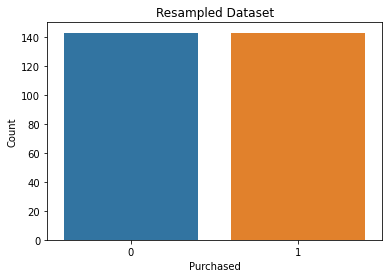

In [140]:
# Visualizing the resampled dataset
sns.countplot(x=y_rus_resampled)
plt.title('Resampled Dataset')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_rus_resampled, y_rus_resampled, test_size=0.2, random_state=42)

In [125]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [129]:
print(f'Test Score :',model.score(x_train,y_train)*100, '%')
print(f'Test Score :',model.score(x_test, y_test)*100, '%')

Test Score : 86.8421052631579 %
Test Score : 77.58620689655173 %


In [138]:
model.predict([[36,33000]])  # Example input for prediction

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [139]:
model.predict([[49,36000]])  # Example input for prediction

c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)